# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tqdm import tqdm
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob
import pandas as pan
import matplotlib.pyplot as plotter
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/defungi/H3/H3_5a_17.jpg
/kaggle/input/defungi/H3/H3_5b_9.jpg
/kaggle/input/defungi/H3/H3_11a_42.jpg
/kaggle/input/defungi/H3/H3_3c_16.jpg
/kaggle/input/defungi/H3/H3_36a_1.jpg
/kaggle/input/defungi/H3/H3_29a_3.jpg
/kaggle/input/defungi/H3/H3_9a_9.jpg
/kaggle/input/defungi/H3/H3_28a_3.jpg
/kaggle/input/defungi/H3/H3_35a_7.jpg
/kaggle/input/defungi/H3/H3_12b_1.jpg
/kaggle/input/defungi/H3/H3_1a_23.jpg
/kaggle/input/defungi/H3/H3_13a_39.jpg
/kaggle/input/defungi/H3/H3_10a_6.jpg
/kaggle/input/defungi/H3/H3_9b_5.jpg
/kaggle/input/defungi/H3/H3_4b_15.jpg
/kaggle/input/defungi/H3/H3_5a_35.jpg
/kaggle/input/defungi/H3/H3_35a_6.jpg
/kaggle/input/defungi/H3/H3_6b_17.jpg
/kaggle/input/defungi/H3/H3_5a_28.jpg
/kaggle/input/defungi/H3/H3_11a_49.jpg
/kaggle/input/defungi/H3/H3_5c_2.jpg
/kaggle/input/defungi/H3/H3_11b_13.jpg
/kaggle/input/defungi/H3/H3_6a_63.jpg
/kaggle/input/defungi/H3/H3_24a_2.jpg
/kaggle/input/defungi/H3/H3_6a_52.jpg
/kaggle/input/defungi/H3/H3_6a_12.jpg
/kaggle/inpu

In [3]:
#Create Files_Name
image_data='/kaggle/input/defungi'
pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

,Files_Name
0,H3
1,H6
2,H5
3,H1
4,H2


In [4]:
#Create Files_Name
#image_data='defungi'
pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

,Files_Name
0,H3
1,H6
2,H5
3,H1
4,H2


In [5]:
files = [i for i in glob.glob(image_data + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pan.DataFrame(data, columns = ["Image", "Label"])
dataframe

,Image,Label
0,/kaggle/input/defungi/H2/H2_53a_12.jpg,H2
1,/kaggle/input/defungi/H3/H3_16a_4.jpg,H3
2,/kaggle/input/defungi/H6/H6_1c_6.jpg,H6
3,/kaggle/input/defungi/H2/H2_32b_1.jpg,H2
4,/kaggle/input/defungi/H2/H2_48b_6.jpg,H2
...,...,...
9109,/kaggle/input/defungi/H6/H6_38a_17.jpg,H6
9110,/kaggle/input/defungi/H2/H2_73a_14.jpg,H2
9111,/kaggle/input/defungi/H1/H1_1d_14.jpg,H1
9112,/kaggle/input/defungi/H3/H3_29a_2.jpg,H3


# Visualization

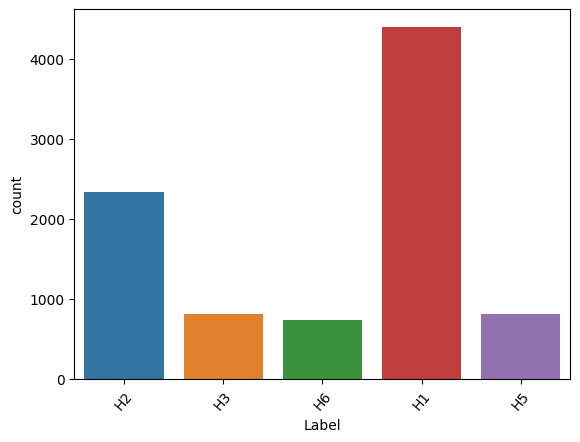

In [6]:
sns.countplot(x = dataframe["Label"])
plotter.xticks(rotation = 50);

# Split Train and Test Dataset

In [7]:
train_data_dir =image_data
batch_size = 16
target_size = (224,224)
validation_split = 0.2
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    labels='inferred',
    label_mode='categorical',
    class_names=['H1','H2','H3','H5','H6'],
    validation_split=validation_split,
    subset="training",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
    shuffle=True,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    labels='inferred',
    label_mode='categorical',
    class_names=['H1','H2','H3','H5','H6'],
    validation_split=validation_split,
    subset="validation",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
    shuffle=True,
)

Found 9114 files belonging to 5 classes.
Using 7292 files for training.
Found 9114 files belonging to 5 classes.
Using 1822 files for validation.


In [8]:
class_names = train.class_names
class_names

['H1', 'H2', 'H3', 'H5', 'H6']

# Model

In [ ]:
##ref:https://keras.io/api/applications/efficientnetB2/

In [10]:
base_model = tf.keras.applications.EfficientNetB2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

31790344/31790344 [==============================] - 0s 0us/step


In [11]:
base_model.name

'efficientnetb2'

In [12]:
base_model.summary()

Model: "efficientnetb2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0

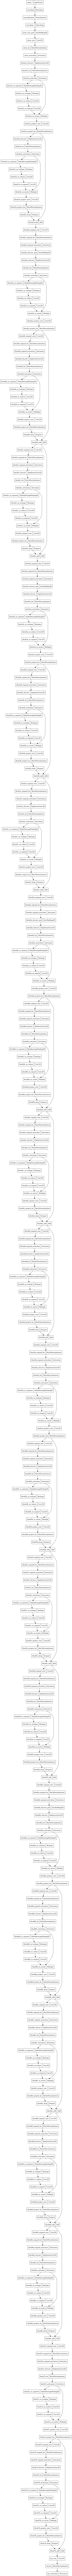

In [13]:
tf.keras.utils.plot_model(base_model)

In [14]:
# Freeze and Train

base_model.trainable = False

inputs = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.applications.efficientnet.preprocess_input(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(5)(x)

model_efficientnet = tf.keras.Model(inputs, outputs)

model_efficientnet.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "best_model_" + base_model.name,
    monitor="val_accuracy",
    mode="max",
    save_best_only=True,
    save_weights_only=True
)

earlystopping = tf.keras.callbacks.EarlyStopping(
    patience=2,
    monitor="val_accuracy",
    restore_best_weights=True
)

training_history = model_efficientnet.fit(
    train,
    validation_data=validation,
    epochs=100,
    callbacks=[checkpoint, earlystopping]
)

model_efficientnet.load_weights("best_model_" + base_model.name)

# Unfreeze and train

base_model.trainable = True

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "best_model_" + base_model.name,
    monitor="val_accuracy",
    mode="max",
    save_best_only=True,
    save_weights_only=True
)

earlystopping = tf.keras.callbacks.EarlyStopping(
    patience=2,
    monitor="val_accuracy",
    restore_best_weights=True
)

model_efficientnet.compile(
    optimizer=tf.keras.optimizers.Adam(1e-6),  # Low learning rate
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

training_history = model_efficientnet.fit(
    train,
    validation_data=validation,
    epochs=100,
    callbacks=[checkpoint, earlystopping]
)

model_efficientnet.load_weights("best_model_" + base_model.name)

Epoch 1/100
456/456 [==============================] - 49s 71ms/step - loss: 1.1748 - accuracy: 0.5012 - val_loss: 1.0091 - val_accuracy: 0.5829
Epoch 2/100
456/456 [==============================] - 28s 62ms/step - loss: 0.9413 - accuracy: 0.6273 - val_loss: 0.8982 - val_accuracy: 0.6394
Epoch 3/100
456/456 [==============================] - 29s 63ms/step - loss: 0.8575 - accuracy: 0.6635 - val_loss: 0.8383 - val_accuracy: 0.6690
Epoch 4/100
456/456 [==============================] - 29s 63ms/step - loss: 0.8067 - accuracy: 0.6840 - val_loss: 0.7983 - val_accuracy: 0.6872
Epoch 5/100
456/456 [==============================] - 29s 62ms/step - loss: 0.7708 - accuracy: 0.7015 - val_loss: 0.7683 - val_accuracy: 0.7031
Epoch 6/100
456/456 [==============================] - 29s 62ms/step - loss: 0.7428 - accuracy: 0.7111 - val_loss: 0.7450 - val_accuracy: 0.7086
Epoch 7/100
456/456 [==============================] - 29s 63ms/step - loss: 0.7206 - accuracy: 0.7205 - val_loss: 0.7265 - val_ac

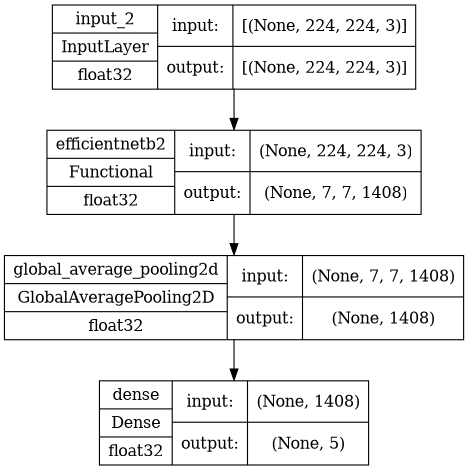

In [15]:
tf.keras.utils.plot_model(model_efficientnet, to_file='model_efficientnetB2.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=80)

In [16]:
score, acc =  model_efficientnet.evaluate(validation)
print('Test Loss =', score)
print('Test Accuracy =', acc)

114/114 [==============================] - 6s 48ms/step - loss: 0.4556 - accuracy: 0.8293
Test Loss = 0.4556352198123932
Test Accuracy = 0.8293084502220154


In [17]:
print(f"finetuned validation accuracy: {acc}")

finetuned validation accuracy: 0.8293084502220154


In [18]:
hist_=pd.DataFrame(training_history.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,0.553524,0.783461,0.587344,0.768386
1,0.528964,0.793472,0.573874,0.777168
2,0.510740,0.800603,0.562768,0.780461
3,0.494797,0.807186,0.553679,0.783754
4,0.479827,0.815003,0.545581,0.782108
5,0.466366,0.821722,0.537504,0.787596
6,0.453795,0.826796,0.530332,0.789791
7,0.441421,0.833516,0.524358,0.791438
8,0.430019,0.837219,0.517430,0.795829
9,0.418353,0.842293,0.511894,0.799122


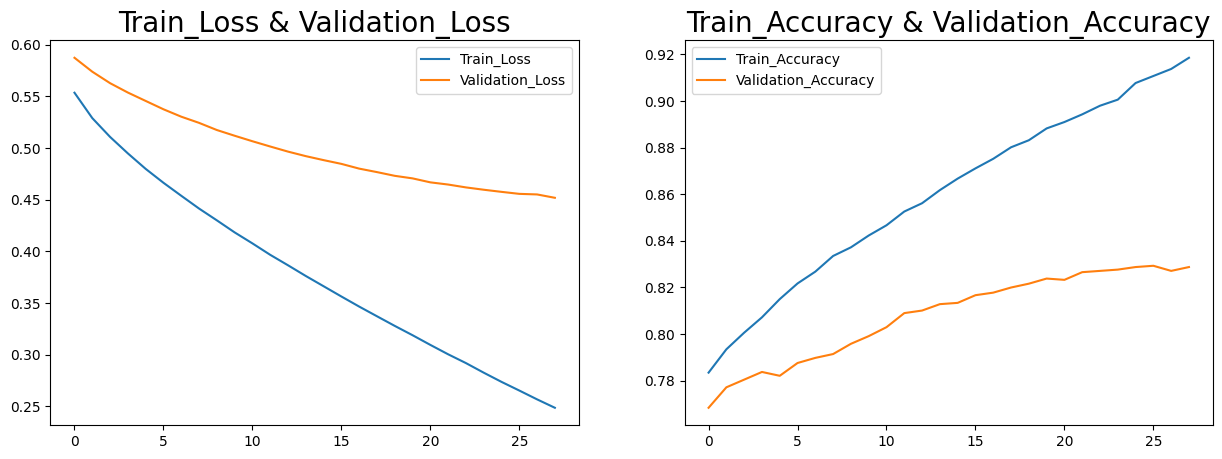

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

In [20]:
X_val,y_val,y_pred=[],[],[]
for images, labels in validation:
    y_val.extend(labels)
    X_val.extend(images)
predictions=model_efficientnet.predict(np.array(X_val))
for i in predictions:
    y_pred.append(np.argmax(i))
df=pd.DataFrame()
df['Actual'],df['Prediction']=y_val,y_pred
df

57/57 [==============================] - 9s 100ms/step


,Actual,Prediction
0,"(tf.Tensor(1.0, shape=(), dtype=float32), tf.T...",0
1,"(tf.Tensor(1.0, shape=(), dtype=float32), tf.T...",0
2,"(tf.Tensor(0.0, shape=(), dtype=float32), tf.T...",3
3,"(tf.Tensor(1.0, shape=(), dtype=float32), tf.T...",0
4,"(tf.Tensor(0.0, shape=(), dtype=float32), tf.T...",3
...,...,...
1817,"(tf.Tensor(1.0, shape=(), dtype=float32), tf.T...",0
1818,"(tf.Tensor(0.0, shape=(), dtype=float32), tf.T...",0
1819,"(tf.Tensor(1.0, shape=(), dtype=float32), tf.T...",0
1820,"(tf.Tensor(1.0, shape=(), dtype=float32), tf.T...",0
